# World Happiness Report (kaggle)

- https://www.kaggle.com/datasets/unsdsn/world-happiness

### 1. 2019 ~ 2015 한국의 행복 순위 비교해보기
### 2. Freedom은 행복에 영향을 미치는지 알아보기

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
happy_2019 = pd.read_csv("data/happiness/2019.csv", encoding = 'utf-8')
happy_2018 = pd.read_csv("data/happiness/2018.csv", encoding = 'utf-8')
happy_2017 = pd.read_csv("data/happiness/2017.csv", encoding = 'utf-8')
happy_2016 = pd.read_csv("data/happiness/2016.csv", encoding = 'utf-8')
happy_2015 = pd.read_csv("data/happiness/2015.csv", encoding = 'utf-8')

In [4]:
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
# 결측치 확인
happy_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
happy_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [7]:
happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
happy_2017.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [9]:
# 원하는 컬럼만 뽑아내기
columns = ["Overall rank", "Country or region", "Score", "Freedom to make life choices"]

happy_2019_2 = happy_2019[columns].copy()
happy_2019_2.columns = ['rank','country','score','Freedom'] # 컬럼 순서 변경하기

happy_2018_2 = happy_2018[columns].copy()
happy_2018_2.columns = ['rank','country','score','Freedom']

happy_2017_2 = happy_2017[['Happiness.Rank', 'Country', 'Happiness.Score', 'Freedom']] # 필요한 컬럼 뽑아내기
happy_2017_2.columns = ['rank','country','score','Freedom']

happy_2016_2 = happy_2016[['Happiness Rank', 'Country', 'Happiness Score', 'Freedom']]
happy_2016_2.columns = ['rank','country','score','Freedom']

happy_2015_2 = happy_2015[['Happiness Rank', 'Country', 'Happiness Score', 'Freedom']]
happy_2015_2.columns = ['rank','country','score','Freedom']

In [10]:
# country 확인하기
happy_2018_2['country'].unique()

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany',
       'Belgium', 'Luxembourg', 'United States', 'Israel',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina',
       'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia',
       'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan',
       'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania',
       'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica',
       'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus',
       'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova',
       'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras',
       'Belarus', 'Turkey

## 한국의 행복 순위 비교하기 (2015 ~ 2019)
### - 한국의 행복 순위는 어떻게 변화되어왔는지 확인하기

In [21]:
# 한국은 몇 위에 있는지 확인하기
#총 156개의 순위에서 한국은 56위이다.
happy_2018_kr = happy_2018_2[happy_2018_2["country"] == "South Korea"] # 한국의 순위만 뽑아오기
happy_2018_kr.columns = ['rank','country','score','Freedom'] # 원하는 컬럼만 뽑기
happy_2018_kr['date'] = ['2018'] # 몇년도 인지 구분하기 위해서 컬럼 추가하기
happy_2018_kr = happy_2018_kr[['date', 'rank','country','score','Freedom']] # 나중에 데이터 합치기 위해서 순서 변경하기
happy_2018_kr

C:\Users\user\AppData\Local\Temp\ipykernel_2344\4122402829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_2018_kr['date'] = ['2018'] # 몇년도 인지 구분하기 위해서 컬럼 추가하기


,date,rank,country,score,Freedom
56,2018,57,South Korea,5.875,0.244


In [22]:
happy_2019_kr = happy_2019_2[happy_2019_2["country"] == "South Korea"]
happy_2019_kr.columns = ['rank','country','score','Freedom']
happy_2019_kr['date'] = ['2019']
happy_2019_kr = happy_2019_kr[['date', 'rank','country','score','Freedom']]
happy_2019_kr

C:\Users\user\AppData\Local\Temp\ipykernel_2344\252685912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy_2019_kr['date'] = ['2019']


,date,rank,country,score,Freedom
53,2019,54,South Korea,5.895,0.159


In [14]:
happy_2017_kr = happy_2017[happy_2017["Country"] == "South Korea"]
happy_2017_kr = happy_2017_kr.drop(['Whisker.high', 'Whisker.low', 'Health..Life.Expectancy.','Family','Economy..GDP.per.Capita.', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'],axis=1)
happy_2017_kr.columns = ['country','rank','score','Freedom']
happy_2017_kr['date'] = ['2017']
happy_2017_kr = happy_2017_kr[['date', 'rank','country','score','Freedom']]
happy_2017_kr

,date,rank,country,score,Freedom
54,2017,55,South Korea,5.838,0.257922


In [15]:
happy_2016_kr = happy_2016[happy_2016["Country"] == "South Korea"]
happy_2016_kr = happy_2016_kr.drop(['Region', 'Lower Confidence Interval', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Trust (Government Corruption)', 'Dystopia Residual', 'Family', 'Generosity', 'Economy (GDP per Capita)'], axis=1)
happy_2016_kr.columns = ['country','rank','score','Freedom']
happy_2016_kr['date'] = ['2016']
happy_2016_kr = happy_2016_kr[['date', 'rank','country','score','Freedom']]
happy_2016_kr

,date,rank,country,score,Freedom
57,2016,57,South Korea,5.835,0.25168


In [16]:
happy_2015_kr = happy_2015[happy_2015["Country"] == "South Korea"]
happy_2015_kr = happy_2015_kr.drop(['Region', 'Standard Error', 'Health (Life Expectancy)', 'Family', 'Economy (GDP per Capita)', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'], axis=1)
happy_2015_kr.columns = ['country','rank','score','Freedom']
happy_2015_kr['date'] = ['2015']
happy_2015_kr = happy_2015_kr[['date', 'rank','country','score','Freedom']]
happy_2015_kr

,date,rank,country,score,Freedom
46,2015,47,South Korea,5.984,0.33208


### 한국 데이터프레임 만들기
#### 컬럼명과 위치를 모두 통일 시킨 다음에 데이터 프레임을 합친다.
#### 1. 한국의 요인만 뽑아내기
#### 2. 몇년도 인지 구별하기 위한 date 추가하기
#### 3. 데이터 프레임을 합치기 위해 2015 ~ 2019의 데이터 프레임의 위치를 똑같이 변경하기
#### 4. 데이터 프레임 합치기

- 2015년도의 Freedom이 가장 높았으며, rank는 가장 높았다. -> Freedom은 행복에 영향을 미친다고 생각 할 수 있다.

In [17]:
# 컬럼명, 위치 모두 통일 -> 데이터 append이용해서 합치기 -> 인덱스 이름을 연도로 변경하기
korea = pd.concat([happy_2019_kr, happy_2018_kr, happy_2017_kr, happy_2016_kr, happy_2015_kr])
korea.reset_index(drop = True, inplace = True)
# korea.rename(index={'0': ''})
korea

,date,rank,country,score,Freedom
0,2019,54,South Korea,5.895,0.159000
1,2018,57,South Korea,5.875,0.244000
2,2017,55,South Korea,5.838,0.257922
3,2016,57,South Korea,5.835,0.251680
4,2015,47,South Korea,5.984,0.332080


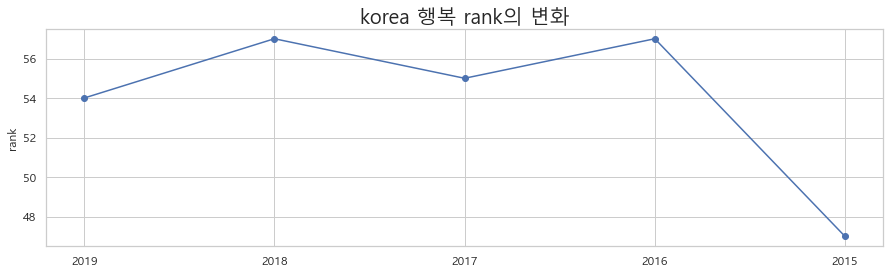

In [18]:
plt.figure(figsize=(15,4))
plt.ylabel("rank",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("korea 행복 rank의 변화", fontsize = 20)
plt.plot(korea['date'], korea['rank'], color = 'b', linestyle = 'solid', marker = 'o', label = "Temperature")
# plt.ylim([40,60])
plt.show()
# 순위가 가장 높은 연도는 2015년도 이며, 가장 낮은 연도는 2018, 2016년도 이다.

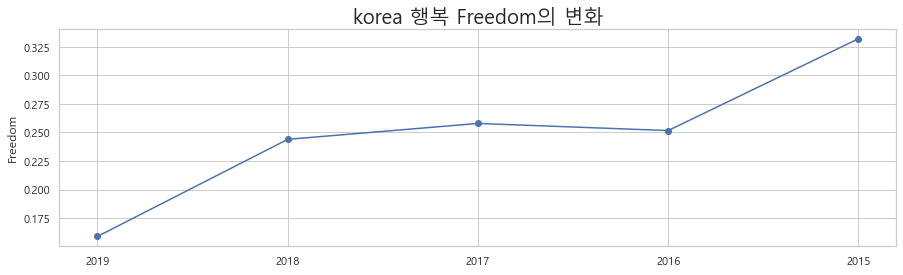

In [20]:
plt.figure(figsize=(15,4))
plt.ylabel("Freedom",fontsize=12)
plt.title("korea 행복 Freedom의 변화", fontsize = 20)
plt.plot(korea['date'], korea['Freedom'], color = 'b', linestyle = 'solid', marker = 'o', label = "Temperature")
# plt.ylim([0,2])
plt.show()
# korea의 자유에 대해서는 2015년도가 가장 높았으며, 2019년도가 가장 낮았다.
# 2015년도의 freedom이 높고, 순위도 2015년도가 가장 높았다.
# 결론 : 한국의 행복 순위에는 Freedom이 영향을 미친다고 생각할 수 있다.

## 앞쪽의 10개의 국가와 뒤쪽의 10개의 국가를 뽑아서 비교해보기

In [22]:
# 10개의 국가만 뽑아서 확인하기
# 2018년도에도 뽑아서 순위가 어떻게 달라졌는지 확인하기
# 어떻게 해야하나...
happy_2015_10 = happy_2015_2.head(10)
happy_2015_10

,rank,country,score,Freedom
0,1,Switzerland,7.587,0.66557
1,2,Iceland,7.561,0.62877
2,3,Denmark,7.527,0.64938
3,4,Norway,7.522,0.66973
4,5,Canada,7.427,0.63297
5,6,Finland,7.406,0.64169
6,7,Netherlands,7.378,0.61576
7,8,Sweden,7.364,0.65980
8,9,New Zealand,7.286,0.63938
9,10,Australia,7.284,0.65124


## 2015년를 기준으로 순위 10 알아보기
- 2015년에 10위 안에 있었던 나라들은 2016 ~ 2019에도 10위권 안에 있었다.
- 2015, 2019년도의 순위는 같았다.
- 가장 변동이 심했던 연도는 2018, 2017 이다.

In [23]:
happy_2015_10['country'].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia'], dtype=object)

In [24]:
# 문자 사이에 공백이 들어가면 안됨
# 2019년도에 1 ~ 10위 순위를 2018 ~ 2015년도엔 어땠을지 확인하기.
happy_2018_10 = happy_2018_2[happy_2018_2["country"].str.contains
                             ('Switzerland|celand|Denmark|Norway|Canada|Finland|Netherlands|Sweden|New Zealand|Australia')]

happy_2017_10 = happy_2017_2[happy_2017_2["country"].str.contains
                             ('Switzerland|celand|Denmark|Norway|Canada|Finland|Netherlands|Sweden|New Zealand|Australia')]

happy_2016_10 = happy_2016_2[happy_2016_2["country"].str.contains
                             ('Switzerland|celand|Denmark|Norway|Canada|Finland|Netherlands|Sweden|New Zealand|Australia')]

happy_2019_10 = happy_2015_2[happy_2015_2["country"].str.contains
                             ('Switzerland|celand|Denmark|Norway|Canada|Finland|Netherlands|Sweden|New Zealand|Australia')]

#### 2015년도와 2016년도를 비교해 보았을때 순위가 크게 변동된 것은 없다. (최소 1, 최대 2 이동)

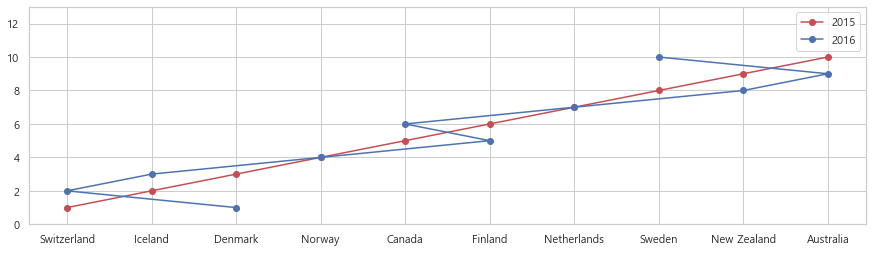

In [48]:
plt.figure(figsize=(15,4))
plt.plot(happy_2015_10['country'], happy_2019_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2015")
plt.plot(happy_2016_10['country'], happy_2018_10['rank'], color = 'b', linestyle = 'solid', marker = 'o', label = "2016")
plt.legend()
plt.ylim([0,13])
plt.show()

#### 그래프가 겹쳐진 것으로 보아 2015년도의 순위와 2019년도의 순위가 같다.

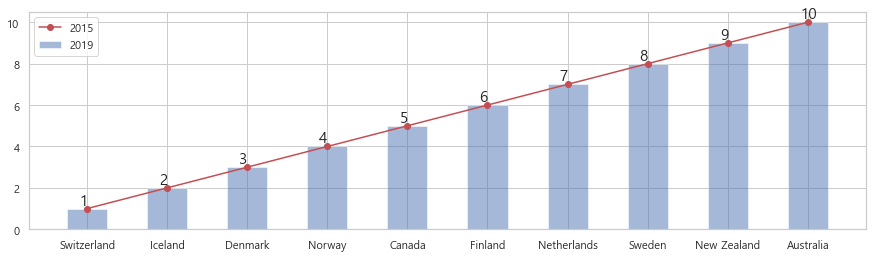

In [49]:
plt.figure(figsize=(15,4))
plt.plot(happy_2015_10['country'], happy_2015_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2015")

plt.bar(happy_2019_10['country'], happy_2019_10['rank'],color = ['b'], width = 0.5, alpha = 0.5, label = "2019")
plt.legend()
for index, value in enumerate(happy_2019_10['rank']):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

#### 2015년도를 기준으로 2018년에는 변동이 있었지만 모두 10위권 안에 있다는 것을 알 수 있다.

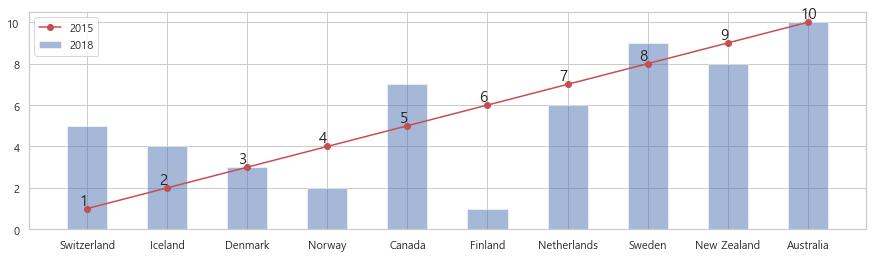

In [50]:
plt.figure(figsize=(15,4))
plt.plot(happy_2015_10['country'], happy_2015_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2015")
# plt.plot(happy_2018_10['country'], happy_2018_10['rank'], color = 'b', linestyle = 'solid', marker = 'o', label = "Temperature")

plt.bar(happy_2018_10['country'], happy_2018_10['rank'],color = ['b'], width = 0.5, alpha = 0.5, label = "2018")
plt.legend()
for index, value in enumerate(happy_2018_10['rank']):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

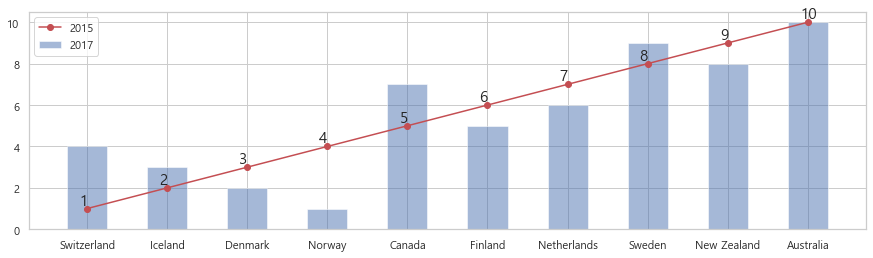

In [51]:
plt.figure(figsize=(15,4))
plt.plot(happy_2015_10['country'], happy_2015_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2015")
# plt.plot(happy_2017_10['country'], happy_2017_10['rank'], color = 'b', linestyle = 'solid', marker = 'o', label = "Temperature")
plt.bar(happy_2017_10['country'], happy_2017_10['rank'],color = ['b'], width = 0.5, alpha = 0.5, label = "2017")
plt.legend()
for index, value in enumerate(happy_2017_10['rank']):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

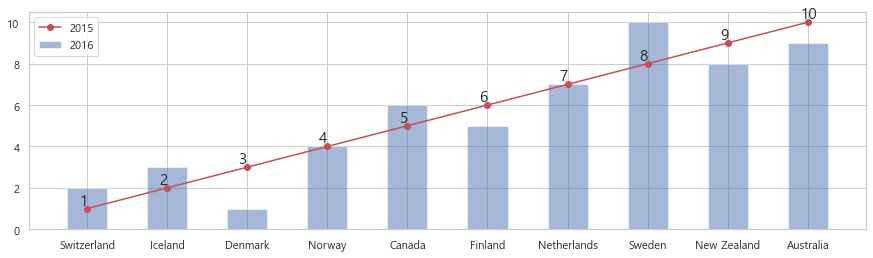

In [52]:
plt.figure(figsize=(15,4))
plt.plot(happy_2015_10['country'], happy_2015_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2015")
# plt.plot(happy_2016_10['country'], happy_2016_10['rank'], color = 'b', linestyle = 'solid', marker = 'o', label = "Temperature")
plt.bar(happy_2016_10['country'], happy_2016_10['rank'],color = ['b'], width = 0.5, alpha = 0.5, label = "2016")
plt.legend()
for index, value in enumerate(happy_2016_10['rank']):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

In [31]:
happy_2015_10.head()

,rank,country,score,Freedom
0,1,Switzerland,7.587,0.66557
1,2,Iceland,7.561,0.62877
2,3,Denmark,7.527,0.64938
3,4,Norway,7.522,0.66973
4,5,Canada,7.427,0.63297


## 2015를 기준으로 freedom 비교해보기
- 자유는 행복에 영향을 미치는지 알아보기

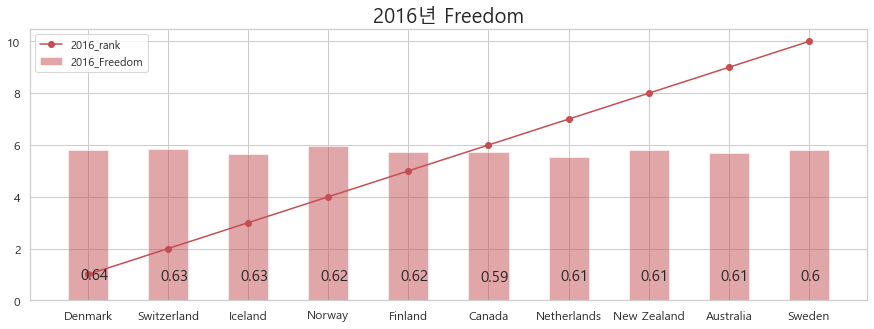

In [54]:
# 2016
plt.figure(figsize=(15,5))
plt.title("2016년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(happy_2016_10['country'], happy_2016_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2016_rank")
plt.bar(happy_2016_10['country'], happy_2016_10['Freedom']*10,color = ['r'], width = 0.5, alpha = 0.5, label = "2016_Freedom")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.legend()

for index, value in enumerate(round(happy_2017_10['Freedom'],2)):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

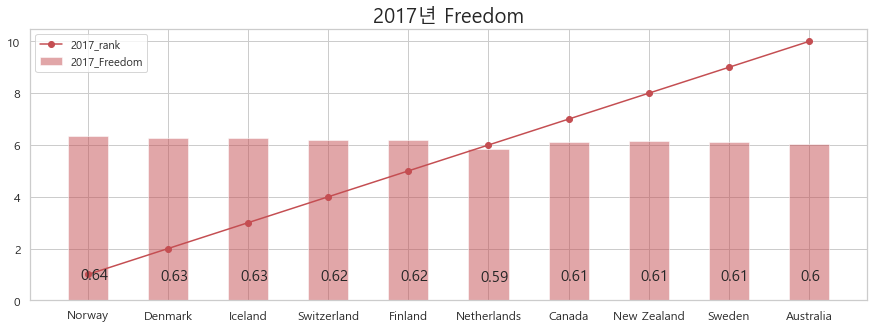

In [56]:
# 2017
plt.figure(figsize=(15,5))
plt.title("2017년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(happy_2017_10['country'], happy_2017_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2017_rank")
plt.bar(happy_2017_10['country'], round(happy_2017_10['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5, label = "2017_Freedom")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.legend()
#plt.bar(happy_2016_10['country'], happy_2016_10['rank'],color = ['b'], width = 0.5, alpha = 0.5)

for index, value in enumerate(round(happy_2017_10['Freedom'],2)):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

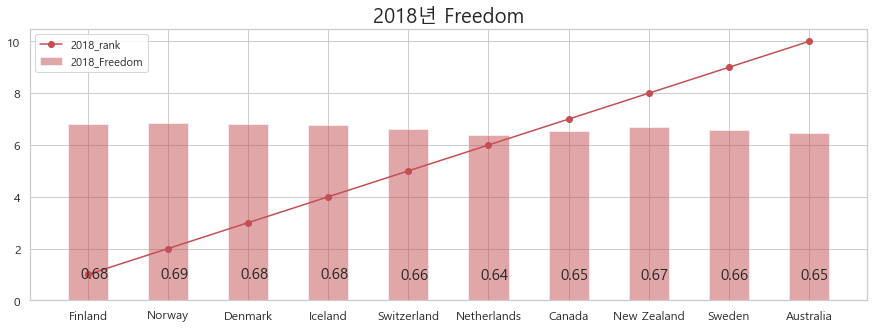

In [57]:
# 2018
plt.figure(figsize=(15,5))
plt.title("2018년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.plot(happy_2018_10['country'], happy_2018_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "2018_rank")
plt.bar(happy_2018_10['country'], round(happy_2018_10['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5, label = "2018_Freedom")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.legend()
#plt.bar(happy_2016_10['country'], happy_2016_10['rank'],color = ['b'], width = 0.5, alpha = 0.5)

for index, value in enumerate(round(happy_2018_10['Freedom'],2)):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

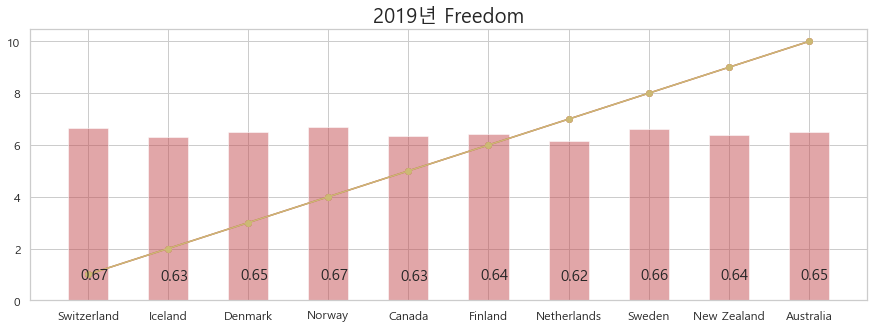

In [36]:
# 2019
plt.figure(figsize=(15,5))
plt.title("2019년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(happy_2015_10['country'], happy_2015_10['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "Temperature")
plt.plot(happy_2019_10['country'], happy_2019_10['rank'], color = 'y', linestyle = 'solid', marker = 'o', label = "Temperature")
plt.bar(happy_2019_10['country'], round(happy_2019_10['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5)
# *10을 해준 이유 : 한눈에 파악하기 위해서

#plt.bar(happy_2016_10['country'], happy_2016_10['rank'],color = ['b'], width = 0.5, alpha = 0.5)

for index, value in enumerate(round(happy_2019_10['Freedom'],2)):
    plt.text(index - 0.1, value, str(value), fontsize = 15, verticalalignment='bottom')
plt.show()

## 끝에서 10번째 비교

In [40]:
happy_2015_tail = happy_2015_2.tail(10)
happy_2015_tail['country'].unique()

array(['Chad', 'Guinea', 'Ivory Coast', 'Burkina Faso', 'Afghanistan',
       'Rwanda', 'Benin', 'Syria', 'Burundi', 'Togo'], dtype=object)

In [41]:
happy_2018_tail = happy_2018_2[happy_2018_2["country"].str.contains
                             ('Chad|Guinea|Ivory Coast|Burkina Faso|Afghanistan|Rwanda|Benin|Syria|Burundi|Togo')]

happy_2017_tail = happy_2017_2[happy_2017_2["country"].str.contains
                             ('Chad|Guinea|Ivory Coast|Burkina Faso|Afghanistan|Rwanda|Benin|Syria|Burundi|Togo')]

happy_2016_tail = happy_2016_2[happy_2016_2["country"].str.contains
                             ('Chad|Guinea|Ivory Coast|Burkina Faso|Afghanistan|Rwanda|Benin|Syria|Burundi|Togo')]

happy_2019_tail = happy_2015_2[happy_2015_2["country"].str.contains
                             ('Chad|Guinea|Ivory Coast|Burkina Faso|Afghanistan|Rwanda|Benin|Syria|Burundi|Togo')]

#### 파란그래프 : 2019년도 1 ~ 10 (head)
#### 빨간 그래프 : 2019년도 끝에서 ~ 10 (tail)
- 끝에 있는 순위보다 앞쪽에 있는 순위의 Freedom이 월등히 높다는 것을 알 수 있다.
- 자유는 행복의 순위에 영향을 미친다고 생각 할 수 있다.

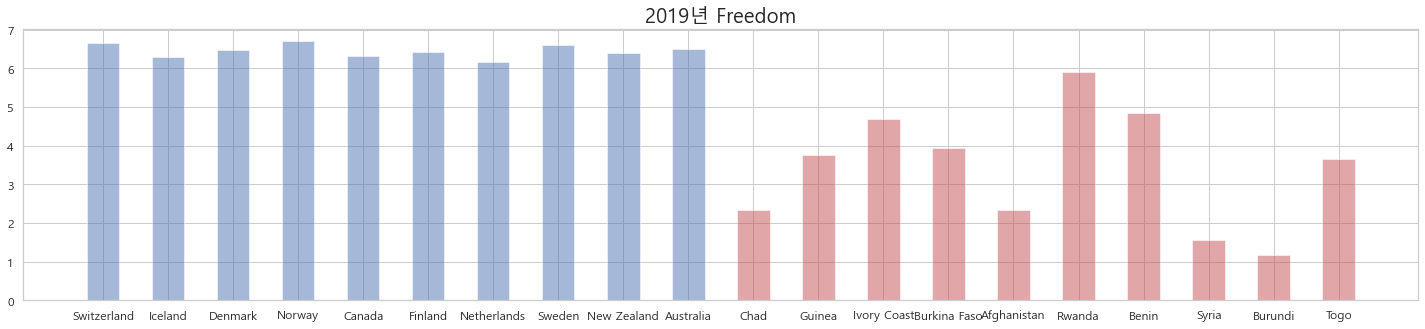

In [47]:
# 2019
plt.figure(figsize=(25,5))
plt.title("2019년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.plot(happy_2015_tail['country'], happy_2015_tail['rank'], color = 'r', linestyle = 'solid', marker = 'o', label = "Temperature")
# plt.plot(happy_2019_tail['country'], happy_2019_tail['rank'], color = 'y', linestyle = 'solid', marker = 'o', label = "Temperature")
plt.bar(happy_2019_10['country'], round(happy_2019_10['Freedom']*10,2),color = ['b'], width = 0.5, alpha = 0.5)
plt.bar(happy_2019_tail['country'], round(happy_2019_tail['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5)
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.show()

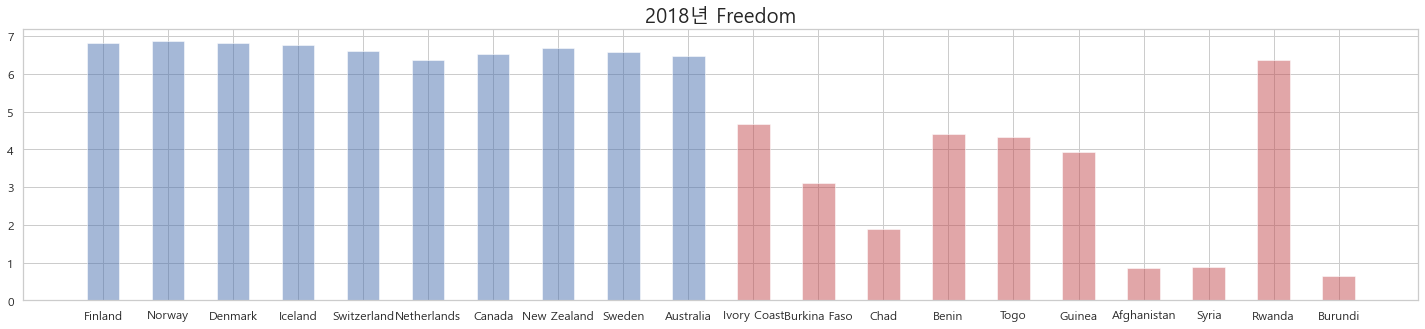

In [58]:
# 2018
plt.figure(figsize=(25,5))
plt.title("2018년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(happy_2018_10['country'], round(happy_2018_10['Freedom']*10,2),color = ['b'], width = 0.5, alpha = 0.5, label = "2018_head")
plt.bar(happy_2018_tail['country'], round(happy_2018_tail['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5, label = "2018_tail")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.show()

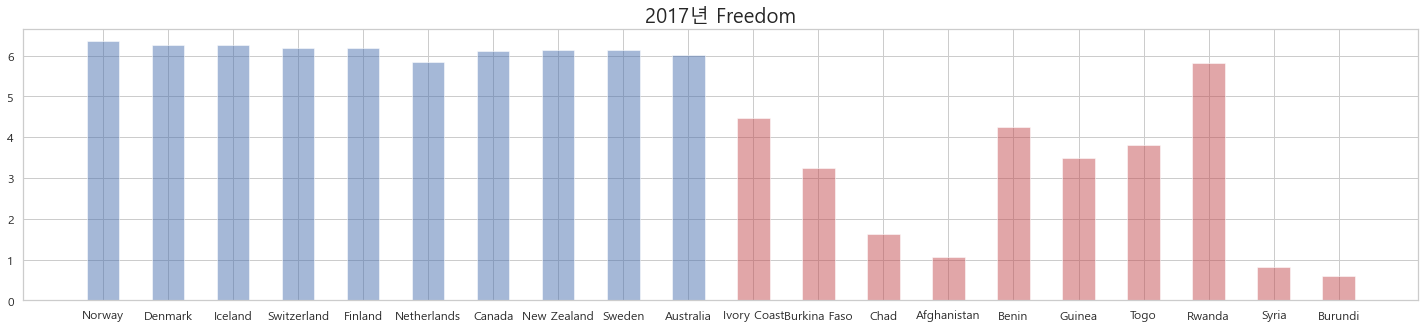

In [59]:
# 2017
plt.figure(figsize=(25,5))
plt.title("2017년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(happy_2017_10['country'], round(happy_2017_10['Freedom']*10,2),color = ['b'], width = 0.5, alpha = 0.5, label = "2017_head")
plt.bar(happy_2017_tail['country'], round(happy_2017_tail['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5, label = "2017_tail")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.show()

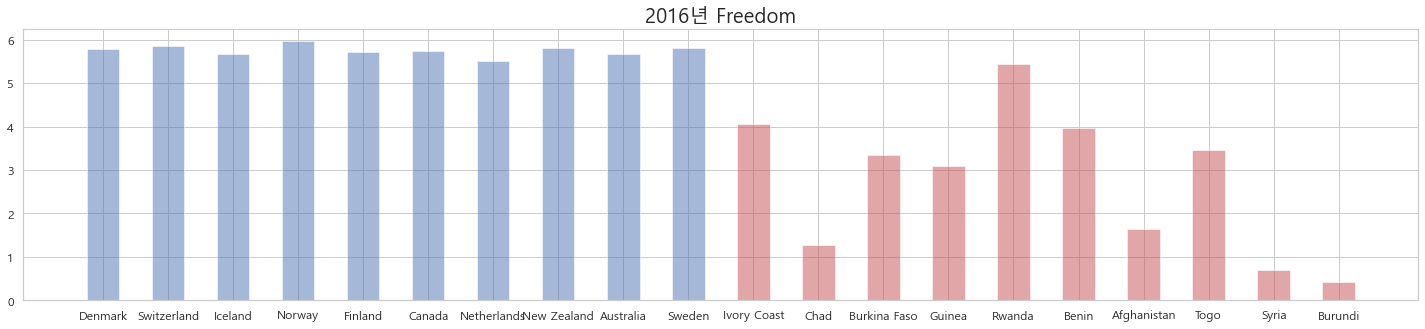

In [60]:
# 2016
plt.figure(figsize=(25,5))
plt.title("2016년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(happy_2016_10['country'], round(happy_2016_10['Freedom']*10,2),color = ['b'], width = 0.5, alpha = 0.5, label = "2016_head")
plt.bar(happy_2016_tail['country'], round(happy_2016_tail['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5, label = "2016_tail")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.show()

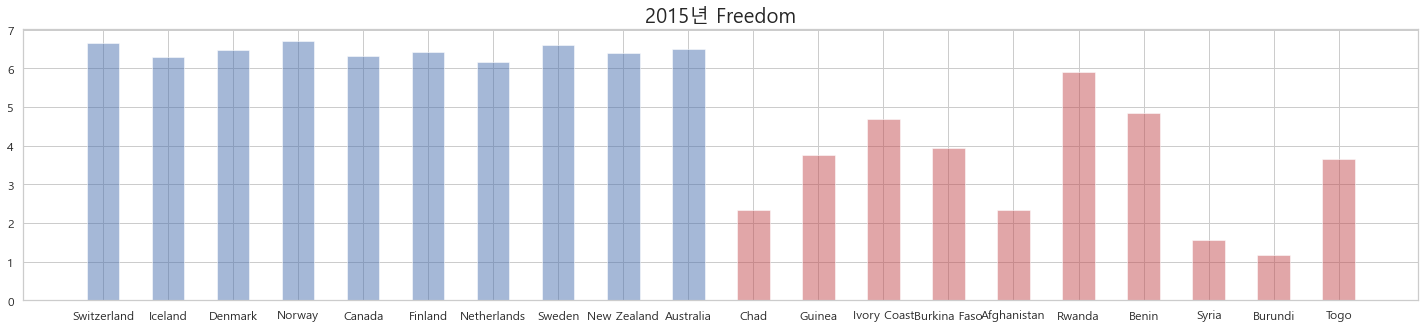

In [61]:
# 2015
plt.figure(figsize=(25,5))
plt.title("2015년 Freedom", fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.bar(happy_2015_10['country'], round(happy_2015_10['Freedom']*10,2),color = ['b'], width = 0.5, alpha = 0.5, label = "2015_head")
plt.bar(happy_2015_tail['country'], round(happy_2015_tail['Freedom']*10,2),color = ['r'], width = 0.5, alpha = 0.5, label = "2015_tail")
# *10을 해준 이유 : 한눈에 파악하기 위해서
plt.show()

In [63]:
happy_2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


## 결론
- 2015 ~ 2019년도의 1 ~ 10위의 나라의 Freedom(head)과 끝 ~ 10개의 나라의 Freedom(tail)을 비교한 결과 대체적으로 1 ~ 10위는 Freedom이 높았으며, 대체적으로 끝쪽의 나라는 Freedom이 낮게 나왔다.
- 2015년도의 score, Freedom이 가장 높았으며, rank는 가장 높았다. -> score와 Freedom은 행복에 영향을 미친다고 생각 할 수 있다.